# Bonus assignment:

**BIOL365 Winter 2025** \
**Due date: March 31, 2025 (11:59 PM)** 

**Total marks: /30**

This notebook contains all questions for the BIOL365 bonus assignment. 

Answers should be typed in the indicated code and markdown blocks. You can create additional code blocks if needed. There is no need to save outputs separately, unless otherwise specified.

**IMPORTANT NOTES**:

- **Do not ask the TAs** for help on this assignment, they are not responsible for anything in the bonus module.

- **Attempt to troubleshoot any issues yourself first**. Most error messages can be solved by a quick google search. Stackoverflow is your friend. 

- If that doesn't work, **check the LEARN discussion forum**. I will be posting solutions to common issues there. 

- If you're still stuck, email Molly or go to office hours. It helps if you can provide screenshots and describe what you've already tried. 

- Marks are given for **final answers** only. No part marks awarded for code that fails to run!

- In the same vein, I am not specifically marking for adherence to good coding practices (e.g., formatting style). However, **I will be reviewing the code for originality**. Evidence of plagiarism will lead to a 0 on the assignment. Properly documenting your code with comments, among other things, can help you avoid this.


Good luck!

---

## Part 1: Filtering NCBI genome datasets

**/7 marks**

The NCBI FTP site (https://ftp.ncbi.nlm.nih.gov/) hosts download links for all of their databases, in a hierarchical organization. 

Follow the link for `genome/`, then `genbank/`. Download the `assembly_summary_genbank.txt` file (right click --> 'save as') into your working directory. \
Do the same for `genome/refseq/` to download the `assembly_summary_refseq.txt` file.  



### Task 1:

**A) Import both files as separate dataframes. (1 mark)** \
Hint: the `skiprows=` parameter can be used to ignore the header (https://pandas.pydata.org/docs/reference/api/pandas.read_table.html). \
You may get a warning about mixed data types, in which case you can follow the recommendation for specifying `low_memory=False`. 

In [ ]:
# %pip install pandas
import pandas as pd

df_gb = pd.read_table('assembly_summary_genbank.txt', skiprows = 1, low_memory=False)
df_rs = pd.read_table('assembly_summary_refseq.txt', skiprows = 1, low_memory=False)

Note: you may need to restart the kernel to use updated packages.


\
Take a look at both dataframes. They should both show a list of accession numbers, each representing an assembled genome in the database. The column headers are identical, and contain info about the source of the assembly, the species (taxid and species_taxid are both unique to the organism, listed under organism_name), and various stats such as the genome size and gene counts. 

There are too many columns to display, so for the sake of convenience, let's filter out some of the irrelevant ones. 

**B) Filter the dataframes to only contain the following columns: (1 mark)**

- `'#assembly_accession'`
- `'refseq_category'`
- `'organism_name'`
- `'assembly_level'`
- `'genome_rep'`
- `'group'`
- `'genome_size'`
- `'genome_size_ungapped'`
- `'gc_percent'`

In [6]:
cols = ['#assembly_accession', 'refseq_category', 'organism_name', 'assembly_level',
        'genome_rep', 'group', 'genome_size', 'genome_size_ungapped', 'gc_percent']

df_gb = df_gb[cols]
df_rs = df_rs[cols]

print(df_gb.head(1))
print(df_rs.head(1))

  #assembly_accession   refseq_category            organism_name  \
0     GCA_000001215.4  reference genome  Drosophila melanogaster   

  assembly_level genome_rep         group  genome_size  genome_size_ungapped  \
0     Chromosome       Full  invertebrate    143706478             142553500   

   gc_percent  
0        42.0  
  #assembly_accession   refseq_category            organism_name  \
0     GCF_000001215.4  reference genome  Drosophila melanogaster   

  assembly_level genome_rep         group  genome_size  genome_size_ungapped  \
0     Chromosome       Full  invertebrate    143706478             142553500   

   gc_percent  
0        42.0  


---


### Task 2: 

Recall that refseq is a curated, non-redundant version of genbank - one sequence per gene per organism. However, for the genome assembly dataset, the level of redundancy is debatable... for example, using `['organism_name'].value_counts()` on the refseq dataframe shows 37,570 genomes for E. coli. This could be due to different strains, assembly methods, etc. 

Regardless, I'm interested in filtering a list of *high quality genomes* with *one unique entry* per species , with the following criteria:

1. Only keep entries listed as `'Full'` under `['genome_rep']` (excludes partial genomes). 
2. Only keep entries listed as `'bacteria'`, `'archaea'`, `'fungi'`, `'invertebrate'`, `'plant'`, `'vertebrate_other'`, `'vertebrate_mammalian'`, and `'protozoa'` under `['group']` (excludes viral, metagenome, and other genomes). 
3. Keep only one value per species (`['organism_name']`), prioritizing entries listed as a `reference genome` under `['refseq_category']`.


**A)** **Apply the above filtering criteria to both the genbank and refseq datasets. (2 marks)**

Hint: the `df.drop_duplicates()` function is useful here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html \
Note the `subset=` parameter. 

In [7]:
# 1.
df_gb = df_gb[df_gb['genome_rep'] == 'Full']
df_rs = df_rs[df_rs['genome_rep'] == 'Full']

# 2.
groups = [ 'bacteria', 'archaea', 'fungi', 'invertebrate', 
    'plant', 'vertebrate_other', 'vertebrate_mammalian', 'protozoa']
df_gb = df_gb[df_gb['group'].isin(groups)]
df_rs = df_rs[df_rs['group'].isin(groups)]

# 3.
print(df_gb['refseq_category'].unique())
print(df_rs['refseq_category'].unique())
# since refseq_category only has tag ref genome and na, sorting alphabetically in reverse order prioritises ref genome 
df_gb = df_gb.sort_values(by=['refseq_category'], ascending=False)
df_rs = df_rs.sort_values(by=['refseq_category'], ascending=False)
df_gb = df_gb.drop_duplicates(subset=['organism_name'], keep='first')
df_rs = df_rs.drop_duplicates(subset=['organism_name'], keep='first')

print(df_gb.head(3))
print(df_rs.head(3))

# Part B:
print()
print(df_gb.count())
print(df_rs.count())

['reference genome' 'na']
['reference genome' 'na']
        #assembly_accession   refseq_category                  organism_name  \
0           GCA_000001215.4  reference genome        Drosophila melanogaster   
2573605     GCA_928724795.1  reference genome  Ustanciosporium gigantosporum   
2573542     GCA_928721695.1  reference genome      Dialister succinatiphilus   

          assembly_level genome_rep         group  genome_size  \
0             Chromosome       Full  invertebrate    143706478   
2573605           Contig       Full         fungi     20177783   
2573542  Complete Genome       Full      bacteria      2486895   

         genome_size_ungapped  gc_percent  
0                   142553500        42.0  
2573605              20177783        52.0  
2573542               2486895        51.0  
       #assembly_accession   refseq_category            organism_name  \
0          GCF_000001215.4  reference genome  Drosophila melanogaster   
303247     GCF_036323495.1  reference ge

**B) How many genomes are in the filtered datasets? (1 mark)**

RefSeq: 87574

GenBank: 141978


\
Next, I want to combine the datasets by adding any genbank genomes that do *not* have an equivalent refseq entry to the refseq dataframe. The accession numbers are similar between refseq and genbank - the only difference being that refseq uses GCF and genbank uses GCA. The 9-digit numerical values in both accessions (excluding the ones after the period, which refer to version number) are shared between entries. 

For example, GCF_000001405.40 and GCA_000001405.29 both map to the same reference genome (*Homo sapiens* assembly GRCh38.p14: https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_000001405.40/). 


\
**C) Create a single dataframe from the refseq and genbank data that contains one unique entry per genome (i.e., remove duplicate GCF/GCA entries). Prioritize refseq entries over genbank entries. Display the dataframe. (2 marks)** 

Hint: The `pd.concat([df1,df2])` function concatenates dataframes by rows: https://pandas.pydata.org/docs/reference/api/pandas.concat.html. 

In [65]:
# extracts the 9 digit num after _ and before .
def get_num(df):
    nums = []
    for accession in df['#assembly_accession']:
        num = accession.split('_')[1]
        num = num.split('.')[0]
        nums.append(num)
    df['num'] = nums

get_num(df_gb)
get_num(df_rs)

rs_unique = df_rs.drop_duplicates(subset=['num'], keep='first')
gb_unique = df_gb[~df_gb['num'].isin(df_rs['num'])]
df_unique = pd.concat([rs_unique, gb_unique])
df_unique = df_unique.drop(columns=['num'])

print(df_unique.duplicated().sum())
print(df_unique)

0
        #assembly_accession   refseq_category  \
0           GCF_000001215.4  reference genome   
303247      GCF_036323495.1  reference genome   
148105      GCF_009729035.1  reference genome   
148104      GCF_009729015.1  reference genome   
148100      GCF_009728935.1  reference genome   
...                     ...               ...   
2301851     GCA_045176805.1                na   
2301947     GCA_045178725.1                na   
2307772     GCA_045291535.1                na   
7154        GCA_000279615.1                na   
2307767     GCA_045291475.1                na   

                                             organism_name   assembly_level  \
0                                  Drosophila melanogaster       Chromosome   
303247                             Limnobacter thiooxidans  Complete Genome   
148105                                Stygiolobus azoricus  Complete Genome   
148104                                Acidianus ambivalens  Complete Genome   
148100        

---

## Part 2: Genome statistics 

**/16 marks**

Let's investigate some relationships between qualitative and quantitative variables in our filtered dataframe. \
Note: plot formatting is not required unless explicitly stated.

### Task 3:

The filtered genomes should all belong to domains archaea, bacteria, and eukarya. Currently, eukaryotes are not explicitly listed in the `['group']` column. 


**A) Create box plots comparing the % GC content of bacterial, archaeal, and eukaryotic genomes (3 categories total). (3 marks)**

/var/folders/s8/28fc93l96dlf8b8vqnt1jtyr0000gn/T/ipykernel_70562/479690567.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([bacteria_gc, archaea_gc, eukaryote_gc], labels=['Bacteria', 'Archaea', 'Eukaryotes'])


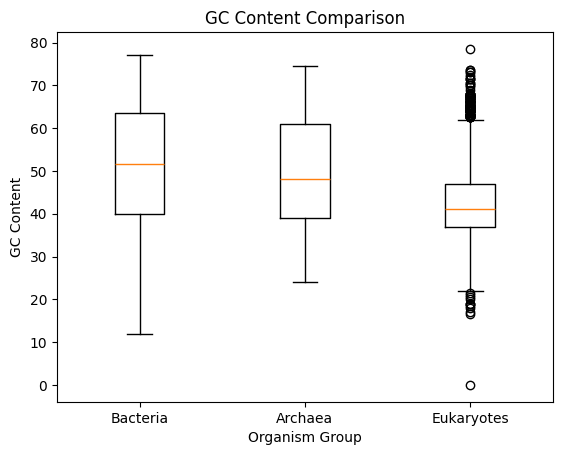

In [66]:
# %pip install matplotlib
import matplotlib.pyplot as plt

bacteria_gc = df_unique[df_unique['group'] == 'bacteria']['gc_percent']
archaea_gc = df_unique[df_unique['group'] == 'archaea']['gc_percent']
eukaryote_gc = df_unique[df_unique['group'].isin(['plant', 'fungi', 'invertebrate', 'vertebrate_other', 'vertebrate_mammalian'])]['gc_percent']
plt.boxplot([bacteria_gc, archaea_gc, eukaryote_gc], labels=['Bacteria', 'Archaea', 'Eukaryotes'])

plt.title('GC Content Comparison')
plt.xlabel('Organism Group')
plt.ylabel('GC Content')

plt.show()

**B) Which group has the highest average GC content? (1 mark)**

BACTERIA

**C) Perform a one-way ANOVA to test for significant differences in GC content across domains. (1 mark)** 

In [67]:
# %pip install scipy
import scipy.stats as stats

F = stats.f_oneway(bacteria_gc, archaea_gc, eukaryote_gc)
print(F.pvalue)

0.0


**E) Are the differences significant? (1 mark)**

Since p < 0.05, there is strong evidence to reject the null hypothesis that there is no significant differences in GC content across domains. So yes, the differences are significant.

---

### Task 4

**A) Create a scatter plot with the** `['genome_size']` **and** `['genome_size_ungapped']` **columns as the x and y values, respectively. Include a line of best fit. (3 marks)**

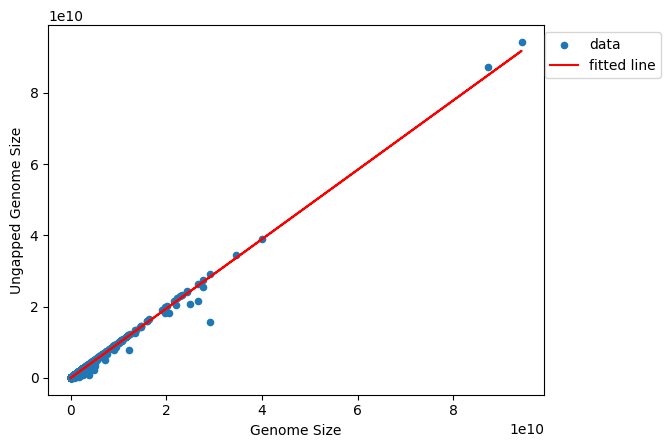

0.9966130248879755


In [ ]:
reg = stats.linregress(df_unique['genome_size'], df_unique['genome_size_ungapped'])
df = df_unique.copy()
df['x_vals'] = df['genome_size']
df['y_vals'] = reg.slope*df['genome_size'] + reg.intercept

# references creating plot tutorial
fig, ax = plt.subplots()
df.plot(kind='scatter', x='genome_size', y='genome_size_ungapped', label='data', ax=ax)
df.plot(kind='line', x='x_vals', y='y_vals', color='r', label='fitted line', ax=ax)
plt.legend(bbox_to_anchor=(1.25, 1))
plt.xlabel('Genome Size', fontsize=10)
plt.ylabel('Ungapped Genome Size', fontsize=10)
plt.show()

# Part B
R = stats.pearsonr(df_unique['genome_size'], df_unique['genome_size_ungapped'])
print (R.correlation)

**B) What is the correlation coefficient (r) between genome size and ungapped genome size? (round to 3 decimals) (1 mark)**

0.997

---

### Task 5

I want to compare the distribution of assembly levels (complete genome, chromosome, contig, etc) between types of genomes in the dataset. 

**A) Create a new dataframe that groups genomes by** `['group']` **, then by** `['assembly_level']` **, showing the genome counts. Then, pivot the dataframe to show the two categories as row and column headers respectively. Scale the values in each row as a percentage of the total row values. Display the dataframe. (3 marks)**

In [69]:
df_group = df_unique.groupby(['group', 'assembly_level']).size()
# print(df_group)

df_group = df_group.reset_index()
df_group.columns = ['group', 'assembly_level', 'genome_counts']
df_group = df_group.pivot(index='group', columns='assembly_level', values='genome_counts')
# print(df_group)

# references excersise 4 in python tutorial
def scale_percent(row):
    return row/row.sum()*100
df_group = df_group.apply(scale_percent, axis=1)
print(df_group)


assembly_level        Chromosome  Complete Genome     Contig   Scaffold
group                                                                  
archaea                 0.620943        16.511431  41.236240  41.631386
bacteria                1.545572        12.594010  45.507405  40.353013
fungi                   4.542382         2.947141  28.727863  63.782615
invertebrate           42.974484         0.314575  23.977630  32.733310
plant                  46.684657         1.734773  15.150347  36.430224
protozoa               10.664172         1.683817  36.108513  51.543499
vertebrate_mammalian   35.587583         0.221729   5.099778  59.090909
vertebrate_other       22.437238         0.052301   4.628661  72.881799


**B) Create a stacked bar plot using the above dataframe (3 marks). The plot must have the following:**
- A title
- X and Y axis labels
- The legend outside of the plot area, with the labels matching the order of how they are displayed on the bars

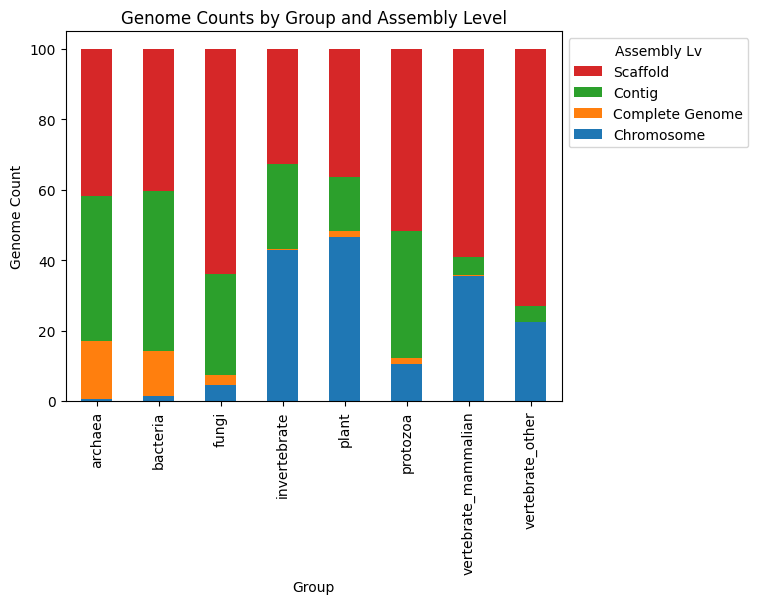

In [70]:
bar = df_group.plot(kind='bar', stacked=True)
plt.title('Genome Counts by Group and Assembly Level')
plt.xlabel('Group')
plt.ylabel('Genome Count')

# references excersise 1b in python tutorial
handles, labels = bar.get_legend_handles_labels() 
legend = bar.legend(
    handles=reversed(handles),
    labels=reversed(labels), 
    bbox_to_anchor=(1, 1), 
    title='Assembly Lv',
    frameon=True
)

plt.show()

---

## Part 3: Labelling phylogenomic trees 

**/7 marks**

Python does have several libraries for parsing FASTA files, aligning sequences, creating/visualizing trees, etc. One major one is Biopython (https://biopython.org/docs/latest/index.html). However, for this assignment I have made the tree using other command line tools.

A brief explanation of the steps I used, for your interest only:

- Filtered the genome dataset to only refseq genomes under `vertebrate_mammalian` (from experience, rendering a 100k+ node tree will crash the online visualizer...)
- Exported the accession numbers as a text file (`genome_accessions.txt`)
- Ran the program `GToTree` (https://github.com/AstrobioMike/GToTree), with the following code:

```bash
GToTree -a genome_accessions.txt -H Universal -j 20 -o ToL -G 0 -B
```

GToTree is a convenient pipeline that combines several other command line bioinformatics software. It uses HMMs (`HMMER`) to find a set of shared marker genes within input genomes (which can be FASTA files uploaded by the user or NCBI accessions that it will download). Then, it aligns them (`MUSCLE`), concatenates the alignments, and finally uses `FastTree`/`IQ-Tree` to create a *phylogenomic* tree of the genomes. The command `-H Universal` in the run code specifies to use the universal 16 marker gene set (Hug et al. 2016), which is a set of ribosomal genes shared between all three domains (bacteria, archaea, eukaryotes). In theory, these could be used for any tree, though it may not be ideal for resolving evolutionary relationships for closely related clades...


---

### Task 6


The output tree file (`mammal_tree.nwk`) is provided. To visualize it, go to the online Interactive Tree of Life tool (https://itol.embl.de/upload.cgi), select the tree file under Choose File, and click Upload. 

As you can see, it automatically renders a circular tree and labels it with the accession numbers. We would like to replace the labels with something more informative, such as the species name. 

Run the following code to generate a list of tree nodes (as a dataframe):

In [108]:
#you only need to do this once, you can comment this line out after
%pip install Biopython 

from Bio import Phylo
tree = Phylo.read('mammal_tree.nwk', "newick")

#extracting nodes as a dataframe column
tree_nodes = pd.DataFrame([node.name for node in tree.get_terminals()], columns=['#assembly_accession'])
tree_nodes = tree_nodes.set_index('#assembly_accession') #setting column as index

tree_nodes #take a look at the df

Note: you may need to restart the kernel to use updated packages.


""
#assembly_accession
GCF_023721935.1
GCF_018350215.1
GCF_024362965.1
GCF_028018385.1
GCF_007474595.2
...
GCF_027475565.1
GCF_016509475.1
GCF_003327715.1


**A) Create another column in the** `tree_nodes` **dataframe that maps the associated species name** (`['organism_name']`) **to the accession. Display the dataframe. (2 marks)** \
Hint: use `df.set_index()` to set a column as an index. The resulting dataframe should only have 1 column (not including the index).

In [109]:
ind = df_unique.set_index('#assembly_accession')['organism_name']
print(ind)

# ref: https://stackoverflow.com/questions/43356704/map-dataframe-index-using-dictionary
tree_nodes['organism_name'] = tree_nodes.index.map(ind)
print(tree_nodes)

#assembly_accession
GCF_000001215.4                              Drosophila melanogaster
GCF_036323495.1                              Limnobacter thiooxidans
GCF_009729035.1                                 Stygiolobus azoricus
GCF_009729015.1                                 Acidianus ambivalens
GCF_009728935.1                       Paenibacillus psychroresistens
                                         ...                        
GCA_045176805.1     Salmonella enterica subsp. enterica serovar Wien
GCA_045178725.1    Salmonella enterica subsp. enterica serovar An...
GCA_045291535.1                               Neorhizobium sp. EC2-8
GCA_000279615.1                      Streptococcus pneumoniae SPAR27
GCA_045291475.1                    Erythrobacteraceae bacterium 1C24
Name: organism_name, Length: 145783, dtype: object
                                organism_name
#assembly_accession                          
GCF_023721935.1                Panthera uncia
GCF_018350215.1                 

**B) Export the dataframe as a .csv file. Include the** `header=False` **parameter to ignore the column names.** 

In [110]:
tree_nodes.to_csv('tree_nodes.csv', header=False)

Open the .csv file in a text editor, and append the following 3 lines before the data:

LABELS

SEPARATOR COMMA

DATA

Save the file, and click + drag it into the iToL viewer with your tree. The labels should now be updated with species names. 

---

### Task 7

In addition to text labels, color-coding the branches of our tree can help visualize phylogenetic relationships between groups. 

The `taxonomy_key.csv` file contains detailed lineage information about each genome. It was also retrieved from the NCBI FTP site under `/pub/taxonomy/`, but I have reformatted it to make it easier to work with. 

**A) Using this file, create and display a dataframe that maps each tree node (by accession) to a color hex code based on the value in the** `['Order']` **column: (2 marks)**

Carnivora: Red (`'#ff0000'`) \
Artiodactyla: Blue (`'#0000ff'`) \
Rodentia: Green (`'#00ff00'`) \
Primates: Orange (`'#ff6600'`) \
Chiroptera: Purple (`'#800080'`) \
Monotremata: Yellow (`'#ffff00'`)\
Other branches can remain black (`'#ffffff'`). 

The resulting dataframe (or series) should only have 1 column (not including the index).

In [113]:
df_tax = pd.read_csv('taxonomy_key.csv')

mapping = {
    'Carnivora': '#ff0000',
    'Artiodactyla': '#0000ff',
    'Rodentia': '#00ff00',
    'Primates': '#ff6600',
    'Chiroptera': '#800080',
    'Monotremata': '#ffff00',
}

df_tax['color'] = df_tax['Order'].map(mapping)
df_tax['color'] = df_tax['color'].fillna('#ffffff') #black for other branches

# filtering df  to one column and making accession the index
df_tax = df_tax[['#assembly_accession', 'color']]
df_tax.set_index('#assembly_accession', inplace=True)
print(df_tax)


                       color
#assembly_accession         
GCA_016840465.1      #ffffff
GCA_029856505.1      #ffffff
GCA_019057385.1      #ffffff
GCA_016840515.1      #ffffff
GCF_019058535.1      #ffffff
...                      ...
GCA_037447605.1      #ffffff
GCA_037447655.1      #ffffff
GCA_029300435.1      #ffffff
GCA_029299945.1      #ffffff
GCA_935751465.1      #ffffff

[126388 rows x 1 columns]


**B) Export the file the same way as in Task 6.**

In [114]:
df_tax.to_csv('tax.csv', header=False)

Open the .csv file in a text editor, and append the following 5 lines before the data:

DATASET_COLORSTRIP

SEPARATOR COMMA	

DATASET_LABEL,Order

COLOR_BRANCHES,1

DATA


Save the file, and click + drag it into the iToL viewer with your tree. The branches should now be color-coded by taxonomy.

**C) Based on what you see, are there any genomes that appear to be either taxonomically misclassified OR incorrectly placed on the tree? List their scientific names below: (1 mark)**

Tree won't load :(

---

### Task 8

Find the Monotremes, and re-root the tree on one of them by hovering over a branch and right clicking --> Tree structure --> Re-root the tree here. On the Control panel in the top right, navigate to the Basic tab and increase the Label Font Size and Branch Line Width to something readable. Then, go to the Export tab and export the Full Image as a PDF. 

**Submit the PDF tree file (2 marks) along with the assignment notebook to the dropbox for marking.**

---

**END OF ASSIGNMENT**